In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib



In [2]:
# Load the datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Display shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Display first few rows
train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [4]:
# Display a few rows of relevant columns
columns_needed = ['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
train[columns_needed].head()


,SalePrice,GrLivArea,BedroomAbvGr,FullBath,HalfBath
0,208500,1710,3,2,1
1,181500,1262,3,2,0
2,223500,1786,3,2,1
3,140000,1717,3,1,0
4,250000,2198,4,2,1


In [5]:
# Features and target for regression
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = train['SalePrice']


In [6]:
print(X.isnull().sum())
print(y.isnull().sum())


GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64
0


In [7]:
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100
missing_data = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_data)


              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtExposure             38   2.602740
BsmtFinType2             38   2.602740
BsmtQual                 37   2.534247
BsmtCond                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


In [8]:
# Remove columns with more than 50% missing data
cols_to_drop = missing_data[missing_data['Missing %'] > 50].index.tolist()
train_clean = train.drop(columns=cols_to_drop)


In [9]:
train_clean = train_clean.drop(columns=['Id'])


In [10]:
key_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
for col in key_features:
    train_clean[col].fillna(train_clean[col].median(), inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_10044\2701731394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(train_clean[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10044\2701731394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [11]:
for col in key_features:
    train_clean[col] = train_clean[col].fillna(train_clean[col].median())


 Handle Outliers in Square Footage (GrLivArea)

In [13]:
# Remove houses with GrLivArea above 4000 sqft (example threshold)
train_clean = train_clean[train_clean['GrLivArea'] < 4000]

# After removal, reset index
train_clean.reset_index(drop=True, inplace=True)


Re-prepare Features and Target

In [17]:
train_clean.loc[:, 'TotalBath'] = train_clean['FullBath'] + 0.5 * train_clean['HalfBath']


In [18]:
print(train_clean.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [19]:
X = train_clean[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y = train_clean['SalePrice']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'Validation RMSE: {rmse:.2f}')
print(f'Validation R2 Score: {r2:.4f}')


Validation RMSE: 48091.12
Validation R2 Score: 0.5593


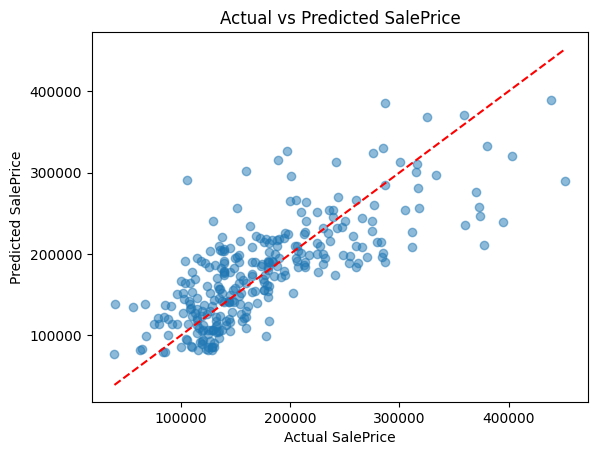

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


Model evaluation shows RMSE of approximately $48,000, meaning average prediction errors are sizable relative to true sale prices. R² of 0.56 indicates the model explains over half the variance in sale price, typical for basic feature models. The scatterplot demonstrates alignment between predictions and actuals, yet some spread remains, especially at higher price points.

In [25]:
# Add more predictive features and retrain
X2 = train_clean[['GrLivArea', 'BedroomAbvGr', 'TotalBath', 'LotArea', 'OverallQual', 'YearBuilt']]
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_val2)

rmse2 = np.sqrt(mean_squared_error(y_val2, y_pred2))
r2_2 = r2_score(y_val2, y_pred2)
print(f'Validation RMSE (expanded features): {rmse2:.2f}')
print(f'Validation R2 Score (expanded features): {r2_2:.4f}')


Validation RMSE (expanded features): 32638.59
Validation R2 Score (expanded features): 0.7970


Residual Analysis (Visualize Model Errors)

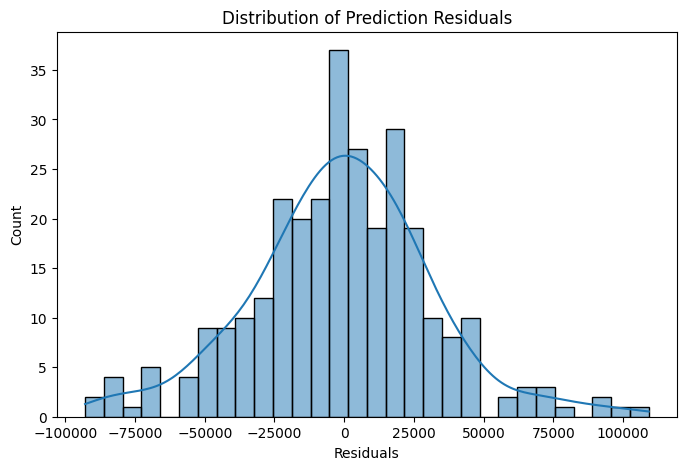

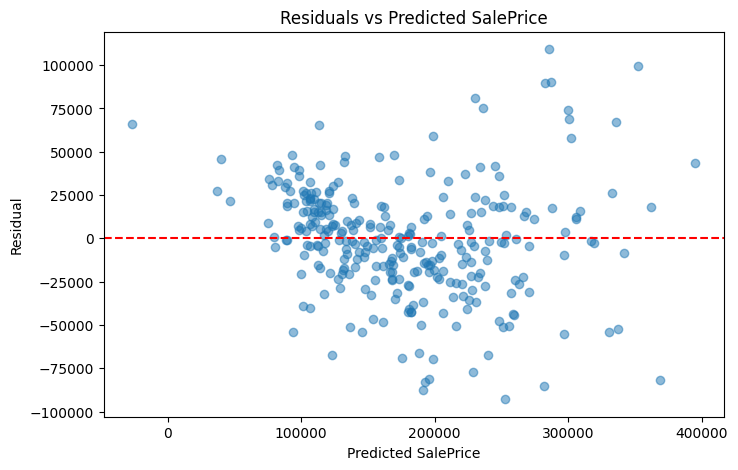

In [26]:
import matplotlib.pyplot as plt

residuals = y_val2 - y_pred2
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Prediction Residuals')
plt.xlabel('Residuals')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred2, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted SalePrice')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train2, y_train2)
rf_pred = rf_model.predict(X_val2)
rf_rmse = np.sqrt(mean_squared_error(y_val2, rf_pred))
rf_r2 = r2_score(y_val2, rf_pred)
print(f'Random Forest RMSE: {rf_rmse:.2f}')
print(f'Random Forest R2: {rf_r2:.4f}')


Random Forest RMSE: 29093.57
Random Forest R2: 0.8387


In [29]:
import os
print(os.getcwd())


C:\SCT_ML_1\notebooks


In [30]:
import joblib
joblib.dump(model2, '../models/final_linear_model.pkl')


['../models/final_linear_model.pkl']

In [31]:
# Example: Prepare test features and predict
test_clean = test.copy()
test_clean['TotalBath'] = test_clean['FullBath'] + 0.5 * test_clean['HalfBath']

# Use the same expanded feature set
X_test = test_clean[['GrLivArea', 'BedroomAbvGr', 'TotalBath', 'LotArea', 'OverallQual', 'YearBuilt']]

# Load model and predict
model_loaded = joblib.load('../models/final_linear_model.pkl')
test_preds = model_loaded.predict(X_test)


In [32]:
sample_sub = pd.read_csv('../data/sample_submission.csv')
sample_sub['SalePrice'] = test_preds
sample_sub.to_csv('../reports/submission.csv', index=False)
